#***Youtube Preprocessing***

In [1]:
!pip install youtube_transcript_api

In [2]:
from youtube_transcript_api import YouTubeTranscriptApi

In [3]:
from IPython.display import YouTubeVideo

In [4]:
video=input("Enter the link of your YouTube Video: ")

Enter the link of your YouTube Video: https://www.youtube.com/watch?v=tXVNS-V39A0


In [5]:
id_video=video.split("=")[1]
print(id_video)

tXVNS-V39A0


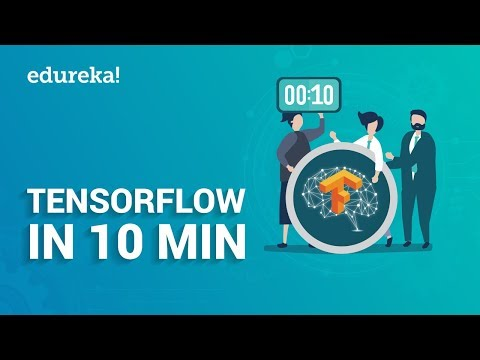

In [6]:
YouTubeVideo(id_video)

In [7]:
transcript = YouTubeTranscriptApi.get_transcript(id_video)

In [8]:
transcript

[{'duration': 2.569,
  'start': 12.0,
  'text': 'Machine learning is\na complex discipline'},
 {'duration': 3.018,
  'start': 14.569,
  'text': 'but implementing machine\nlearning models is far'},
 {'duration': 1.713, 'start': 17.587, 'text': 'less daunting and difficult'},
 {'duration': 1.5, 'start': 19.3, 'text': 'than it used to be. Thanks'},
 {'duration': 3.3,
  'start': 20.8,
  'text': "to machine learning Frameworks\nsuch as Google's TensorFlow"},
 {'duration': 1.5, 'start': 24.1, 'text': 'that ease the process'},
 {'duration': 3.535,
  'start': 25.6,
  'text': 'of acquiring data, training model,\nsolving predictions'},
 {'duration': 2.565,
  'start': 29.135,
  'text': 'and refining future\nresults. Created by'},
 {'duration': 3.406,
  'start': 31.7,
  'text': 'the Google brain team tensorflow\nis an open source library'},
 {'duration': 1.494, 'start': 35.106, 'text': 'for numerical computation'},
 {'duration': 3.511,
  'start': 36.6,
  'text': 'and large scale machine learning.\

In [9]:
doc = ""
for line in transcript:
    doc =doc+ ' ' + line['text']
print(type(doc))
print(doc)
#print(len(result))

<class 'str'>
 Machine learning is
a complex discipline but implementing machine
learning models is far less daunting and difficult than it used to be. Thanks to machine learning Frameworks
such as Google's TensorFlow that ease the process of acquiring data, training model,
solving predictions and refining future
results. Created by the Google brain team tensorflow
is an open source library for numerical computation and large scale machine learning.
Tensorflow bundles together a study of machine learning and deep learning models and algorithms and make
them useful by way of common metaphor who will use machine learning
and all of its products to improve the search engine
the translation image captioning or the recommendations to give
you a concrete example, Google users can experience
a faster and more refined search with artificial intelligence. If the user types a keyword
in the search bar Google provides a recommendation about
what could be the next world not as a flow is being used

In [10]:
doc=[]
for line in transcript:
  if "\n" in line['text']:
    x=line['text'].replace("\n"," ")
    doc.append(x)
  else:
    doc.append(line['text'])
print(doc)

['Machine learning is a complex discipline', 'but implementing machine learning models is far', 'less daunting and difficult', 'than it used to be. Thanks', "to machine learning Frameworks such as Google's TensorFlow", 'that ease the process', 'of acquiring data, training model, solving predictions', 'and refining future results. Created by', 'the Google brain team tensorflow is an open source library', 'for numerical computation', 'and large scale machine learning. Tensorflow bundles together', 'a study of machine learning', 'and deep learning models', 'and algorithms and make them useful by way', 'of common metaphor', 'who will use machine learning and all of its products', 'to improve the search engine the translation image captioning', 'or the recommendations to give you a concrete example,', 'Google users can experience a faster and more refined search', 'with artificial intelligence.', 'If the user types a keyword in the search bar Google', 'provides a recommendation about what c

In [11]:
paragraph=" ".join(doc)
print(paragraph)

Machine learning is a complex discipline but implementing machine learning models is far less daunting and difficult than it used to be. Thanks to machine learning Frameworks such as Google's TensorFlow that ease the process of acquiring data, training model, solving predictions and refining future results. Created by the Google brain team tensorflow is an open source library for numerical computation and large scale machine learning. Tensorflow bundles together a study of machine learning and deep learning models and algorithms and make them useful by way of common metaphor who will use machine learning and all of its products to improve the search engine the translation image captioning or the recommendations to give you a concrete example, Google users can experience a faster and more refined search with artificial intelligence. If the user types a keyword in the search bar Google provides a recommendation about what could be the next world not as a flow is being used by a lot of Co

#***Extractive YouTube Summary***

##NLTK Summarization

In [12]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

In [13]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
mytext= paragraph

In [16]:
stops = set(stopwords.words('english'))
word_array = word_tokenize(mytext)

wordfreq=dict()
for word in word_array:
  word=word.lower()
  if word in stops:
    continue
  elif word in wordfreq:
    wordfreq[word]+=1
  else:
    wordfreq[word]=1

#word_array
#frequencytable


In [17]:
sent_array=sent_tokenize(mytext)

sentfreq=dict()
for sentence in sent_array:
  for word,freq in wordfreq.items():
    if word in sentence.lower():
      if sentence in sentfreq:
        sentfreq[sentence]+=freq
      else:
        sentfreq[sentence]=freq  

#sentfreq

In [18]:
averageval=0
for sentence in sentfreq:
  averageval+=sentfreq[sentence]

average=int(averageval/len(sentfreq))

In [19]:
summary=''
for sentence in sent_array:
  if(sentence in sentfreq) and (sentfreq[sentence]>(1.5*average)):
    summary=summary+" "+sentence
print(summary)

 Thanks to machine learning Frameworks such as Google's TensorFlow that ease the process of acquiring data, training model, solving predictions and refining future results. Tensorflow bundles together a study of machine learning and deep learning models and algorithms and make them useful by way of common metaphor who will use machine learning and all of its products to improve the search engine the translation image captioning or the recommendations to give you a concrete example, Google users can experience a faster and more refined search with artificial intelligence. The Airbnb ingenious and data science team applies machine learning using tensorflow to classify the images and detect objects at scale helping to improve the guest experience and we talked about the healthcare industry using tensorflow GE Healthcare is training a neural network to identify specific anatomic during the brain MRI exam to help improve speed and reliability now PayPal is using it as a flow to stay at The 

##Spacy Summarization


In [20]:
!pip install spacy
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

In [21]:
stopwords=list(STOP_WORDS)
from string import punctuation
punctuation=punctuation+ '\n'
#punctuation

In [22]:
text=paragraph
space = spacy.load('en_core_web_sm')
doc= space(text)

In [23]:
word_frequencies={}
for word in doc:
  if word.text.lower() not in stopwords:
      if word.text.lower() not in punctuation:
          if word.text not in word_frequencies.keys():
              word_frequencies[word.text] = 1
          else:
              word_frequencies[word.text] += 1

In [24]:
max_frequency=max(word_frequencies.values())
for word in word_frequencies.keys():
  word_frequencies[word]=word_frequencies[word]/max_frequency

In [25]:
sentence_tokens= [sent for sent in doc.sents]
sentence_scores = {}
for sent in sentence_tokens:
  for word in sent:
      if word.text.lower() in word_frequencies.keys():
          if sent not in sentence_scores.keys():                            
            sentence_scores[sent]=word_frequencies[word.text.lower()]
          else:
            sentence_scores[sent]+=word_frequencies[word.text.lower()]
#sentence_scores  

In [26]:
percent=int(input("How much percentage of summary you want? "))
ratio=(int(percent)) / 100
#ratio

How much percentage of summary you want? 30


In [27]:
from heapq import nlargest
select_length=int(len(sentence_tokens)*ratio)
select_length
summary=nlargest(select_length, sentence_scores,key=sentence_scores.get)
summary

[Usually any machine learning or deep learning process has some similar steps, but in this case of terms of flow it is so simple any typical machine learning life Lord any process has some of the steps like collection of data set than building the model training the network evaluating the model and then predicting the outcome in case of tensorflow.,
 Tensorflow bundles together a study of machine learning and deep learning models and algorithms and make them useful by way of common metaphor who will use machine learning and all of its products to improve the search engine the translation image captioning or the recommendations to give you a concrete example, Google users can experience a faster and more refined search with artificial intelligence.,
 Each node in the graph represents a mathematical operation and each connection or Edge between the notes is a multi-dimensional data array or tensile test flow provides all of this for the programmer by way of the Python language by then is

In [28]:
final_summary=[word.text for word in summary]
final_summary
summary=''.join(final_summary)
summary

"Usually any machine learning or deep learning process has some similar steps, but in this case of terms of flow it is so simple any typical machine learning life Lord any process has some of the steps like collection of data set than building the model training the network evaluating the model and then predicting the outcome in case of tensorflow.Tensorflow bundles together a study of machine learning and deep learning models and algorithms and make them useful by way of common metaphor who will use machine learning and all of its products to improve the search engine the translation image captioning or the recommendations to give you a concrete example, Google users can experience a faster and more refined search with artificial intelligence.Each node in the graph represents a mathematical operation and each connection or Edge between the notes is a multi-dimensional data array or tensile test flow provides all of this for the programmer by way of the Python language by then is easy 

##Translation


In [29]:
!pip install deep-translator

In [30]:
!pip install googletrans

In [31]:
import googletrans

In [32]:
from deep_translator import GoogleTranslator
from deep_translator import MicrosoftTranslator

In [33]:
print("CHECK OUT YOUR SOURCE LANGUAGE FROM BELOW:")
print(" ")
langdict=googletrans.LANGUAGES
for i in langdict :
    print(i+"-" +langdict[i])
srclang=input("ENTER LANGUAGE CODE: ")

CHECK OUT YOUR SOURCE LANGUAGE FROM BELOW:
 
af-afrikaans
sq-albanian
am-amharic
ar-arabic
hy-armenian
az-azerbaijani
eu-basque
be-belarusian
bn-bengali
bs-bosnian
bg-bulgarian
ca-catalan
ceb-cebuano
ny-chichewa
zh-cn-chinese (simplified)
zh-tw-chinese (traditional)
co-corsican
hr-croatian
cs-czech
da-danish
nl-dutch
en-english
eo-esperanto
et-estonian
tl-filipino
fi-finnish
fr-french
fy-frisian
gl-galician
ka-georgian
de-german
el-greek
gu-gujarati
ht-haitian creole
ha-hausa
haw-hawaiian
iw-hebrew
he-hebrew
hi-hindi
hmn-hmong
hu-hungarian
is-icelandic
ig-igbo
id-indonesian
ga-irish
it-italian
ja-japanese
jw-javanese
kn-kannada
kk-kazakh
km-khmer
ko-korean
ku-kurdish (kurmanji)
ky-kyrgyz
lo-lao
la-latin
lv-latvian
lt-lithuanian
lb-luxembourgish
mk-macedonian
mg-malagasy
ms-malay
ml-malayalam
mt-maltese
mi-maori
mr-marathi
mn-mongolian
my-myanmar (burmese)
ne-nepali
no-norwegian
or-odia
ps-pashto
fa-persian
pl-polish
pt-portuguese
pa-punjabi
ro-romanian
ru-russian
sm-samoan
gd-scots gae

In [34]:
to_translate = summary
translated = GoogleTranslator(source='auto', target=srclang).translate(to_translate)
print("YOUR TRANSLATED SUMMARY IS GIVEN BELOW:")
print(" ")
print(translated)

YOUR TRANSLATED SUMMARY IS GIVEN BELOW:
 
Usually any machine learning or deep learning process has some similar steps, but in this case of terms of flow it is so simple any typical machine learning life Lord any process has some of the steps like collection of data set than building the model training the network evaluating the model and then predicting the outcome in case of tensorflow.Tensorflow bundles together a study of machine learning and deep learning models and algorithms and make them useful by way of common metaphor who will use machine learning and all of its products to improve the search engine the translation image captioning or the recommendations to give you a concrete example, Google users can experience a faster and more refined search with artificial intelligence.Each node in the graph represents a mathematical operation and each connection or Edge between the notes is a multi-dimensional data array or tensile test flow provides all of this for the programmer by wa

##Text To Speech

In [35]:
!pip install gTTS

In [36]:
!pip install pyttsx3  

In [37]:
!pip install pygobject

In [38]:
import gtts 

In [39]:
print("Choose the below option:")
print(" ")
print("E for converting extracted summary to speech.\n" "T for converting translated summary to speech.\n" "B for converting both translated and extracted summary to speech.")
option=input("Enter your choice: ")

Choose the below option:
 
E for converting extracted summary to speech.
T for converting translated summary to speech.
B for converting both translated and extracted summary to speech.
Enter your choice: e


In [40]:
if option=='E' or option=='e':
  speechtext=summary
  speech1=gtts.gTTS(speechtext)
  name1=input("Enter name of Extracted Summary file: ")
  speech1.save(name1+".mp3")

elif option=='T' or option=='t':
  speechtext=translated
  speech1=gtts.gTTS(speechtext)
  name2=input("Enter name of Translated Summary file: ")
  speech1.save(name2+".mp3")

elif option=='B' or option=='b':
  speechtext1=summary
  speechtext2=translated
  speech1=gtts.gTTS(speechtext1)
  speech2=gtts.gTTS(speechtext2)
  name1=input("Enter name of Extracted Summary file: ")
  name2=input("Enter name of Translated Summary file: ")
  speech1.save(name1+".mp3")
  speech2.save(name2+".mp3")

else:
  print("Invalid Option")

Enter name of Extracted Summary file: file1


#***Abstractive Based Summary***

In [41]:
!pip install transformers

In [42]:
from transformers import pipeline

In [43]:
summarizer = pipeline('summarization')

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 (https://huggingface.co/sshleifer/distilbart-cnn-12-6)


In [44]:
result=paragraph

In [45]:
num_iters = int(len(result)/1000)
summarized_text = []
for i in range(0, num_iters + 1):
  start = 0
  start = i * 1000
  end = (i + 1) * 1000
  print("input text \n" + result[start:end])
  out = summarizer(result[start:end])
  out = out[0]
  out = out['summary_text']
  print("Summarized text\n"+out)
  summarized_text.append(out)

#print(summarized_text)

input text 
Machine learning is a complex discipline but implementing machine learning models is far less daunting and difficult than it used to be. Thanks to machine learning Frameworks such as Google's TensorFlow that ease the process of acquiring data, training model, solving predictions and refining future results. Created by the Google brain team tensorflow is an open source library for numerical computation and large scale machine learning. Tensorflow bundles together a study of machine learning and deep learning models and algorithms and make them useful by way of common metaphor who will use machine learning and all of its products to improve the search engine the translation image captioning or the recommendations to give you a concrete example, Google users can experience a faster and more refined search with artificial intelligence. If the user types a keyword in the search bar Google provides a recommendation about what could be the next world not as a flow is being used by

Your max_length is set to 142, but you input_length is only 79. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=39)


Summarized text
 Tensorflow is a simple program that consists of a construction phase and then an execution phase . It has eager execution by default which makes things so much simpler and easier to code . So as you can see with either X You should our program has a strong to a few lines of code .
input text 
ee for yourself. What an incredible framework this is till then thank you and happy learning. I hope you have enjoyed listening to this video. Please be kind enough to like it and you can comment any of your doubts and queries and we will reply them at the earliest do look out for more videos in our playlist And subscribe to Edureka channel to learn more. Happy learning.
Summarized text
 Edureka is an incredible framework for learning. ee for yourself. I hope you have enjoyed listening to this video. Please be kind enough to like it and you can comment any of your doubts and queries and we will reply them at the earliest do look out for more videos in our playlist .


In [73]:
mysummary=" ".join(summarized_text)
print(mysummary)

 Machine learning is a complex discipline but implementing machine learning models is far less daunting and difficult than it used to be . Frameworks such as Google's TensorFlow that ease the process of acquiring data, training model, solving predictions and refining future results . Google users can experience a faster and more refined search with artificial intelligence .  Airbnb uses tensorflow to classify the images and detect objects at scale . GE Healthcare is training a neural network to identify specific anatomic during the brain MRI exam to help improve speed and reliability now PayPal is using it as a flow to stay at The Cutting Edge of fraud detection . China mobile is using tensorflows to improve their success rate of the network element cut overs Channel .  Tessa flow offers multiple level of abstractions, so you can choose the right one for your needs . Kira's API makes getting started with tensorflow and machine learning very very easy . Kira has already successfully sup